## Validacion de un Modelo de manera incorrecta

In [87]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

In [88]:
iris=load_iris()
X=iris.data
Y=iris.target

 **Ahora tenemos que elegir el modelo y los hiperparametros**

In [89]:
from sklearn.neighbors import KNeighborsClassifier

In [90]:
model= KNeighborsClassifier(n_neighbors=1)

In [91]:
model.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [92]:
y_model=model.predict(X)

In [93]:
from sklearn.metrics import accuracy_score

accuracy_score(Y,y_model)

1.0

#### Los resultado obtenidos fueron con una presicion del 100% pero no siempre es asi

## Validacion de Modelos de manera Correcta

Conjunto de retensiones

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
#ahora partimos los datos de entrenamiento y testeo
Xtrain,Xtest,Ytrain,Ytest =train_test_split(X,Y,random_state=0,test_size=0.2)

In [96]:
model.fit(Xtrain,Ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [97]:
#ahora evaluamos los modelos con los datos de prueba
y_model=model.predict(Xtest)

In [98]:
accuracy_score(Ytest,y_model)

1.0

### Metodo de validacion cruzada,
es un metodo mucho mas eficiente ya que nos permite explorar el conjunto de datos que deseamos testear segun sea la puntuacion obtenida en la presicion de estos

In [99]:
from sklearn.model_selection import cross_val_score

score=cross_val_score(model,X,Y,cv=5)
score

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

Pero si en casos extremos deseamos explorar un determinado conjunto de datos igual aal total de estos usaremos, tendriamos que usar la **Validacion Cruzada de salida uno**

In [100]:
from sklearn.model_selection import LeaveOneOut

loo=LeaveOneOut()
score=cross_val_score(model,X,Y,cv=loo)
score.mean()

0.96

### La compensacion SESGO-VARIANZA

[Image](https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.03-validation-curve.png)

        *  Curvas de validacion

In [101]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

In [102]:
def PolynomialRegression(degree=2,**kwargs):
    return make_pipeline(PolynomialFeatures(degree),LinearRegression(**kwargs))

In [103]:
def makedata(N=5, err=0.1):
    rng=np.random.RandomState(0)
    X=rng.rand(N,1)**2
    Y=1+X.ravel()**3
    if err>=0:
        Y+=err*rng.randn(N)
    return X,Y

In [104]:
import seaborn as sns; sns.set()

In [105]:
X,Y=makedata(N=200)


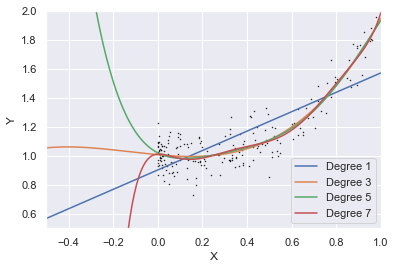

In [106]:
Xtest=np.linspace(-1,1,200)[:,np.newaxis]


plt.scatter(X.ravel(),Y,color='black',s=0.2)

axis=plt.axis()
for degree in [1,3,5,7]:
    Ytest=PolynomialRegression(degree).fit(X,Y).predict(Xtest)
    plt.plot(Xtest.ravel(),Ytest,label='Degree {0}'.format(degree))
plt.xlabel('X')
plt.ylabel('Y')
plt.ylim(0.5,2)
plt.xlim(-0.5,1)
plt.legend(loc='best')
    

In [107]:
from sklearn.model_selection import validation_curve

In [108]:
train_scores,test_scores=validation_curve(LinearRegression(),X,Y,param_name='fit_intercept',param_range=[True,False],cv=7)

In [113]:
train_scores.mean(axis=1)

array([ 0.64467406, -5.41037975])

In [110]:
test_scores

array([[ 0.66890335,  0.60568707,  0.63325528,  0.66676462,  0.61942096,
         0.66664263,  0.54782695],
       [-3.90717069, -6.24098144, -8.28882237, -4.09215847, -6.30021347,
        -4.49407551, -6.86375651]])

In [112]:
test_scores.mean(axis=1)

array([ 0.62978584, -5.7410255 ])

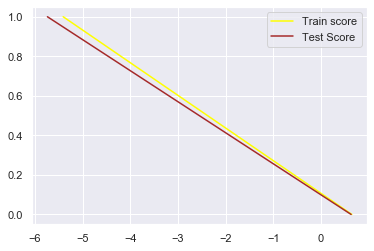

In [115]:
ylb=np.arange(0,2)
plt.plot(train_scores.mean(axis=1),ylb,color='yellow',label='Train score')
plt.plot(test_scores.mean(axis=1),ylb,color='brown',label='Test Score')
plt.legend(loc='best')

In [74]:
degree=np.arange(0,20)
X,Y=makedata(N=500)
train_scores,test_scores=validation_curve(PolynomialRegression(),X,Y,
                                          param_name='polynomialfeatures__degree',
                                          param_range=degree,
                                          cv=7
                                         )




(0, 5)

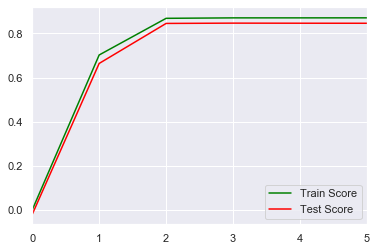

In [77]:

plt.plot(degree,train_scores.mean(axis=1),color='green',label='Train Score')
plt.plot(degree,test_scores.mean(axis=1),color='red',label='Test Score')

plt.legend(loc='best')
plt.xlim(0,5)

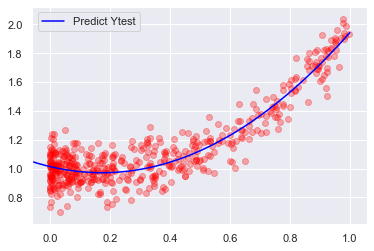

In [78]:
plt.scatter(X.ravel(),Y,color='red',alpha=0.3)

Ytest=PolynomialRegression(degree=2).fit(X,Y).predict(Xtest)
axis=plt.axis()
plt.plot(Xtest.ravel(),Ytest,color='blue',label='Predict Ytest')

plt.axis(axis)
plt.legend(loc='best')

In [116]:
from sklearn.model_selection import learning_curve

In [119]:
train_sizes,train_scores,test_scores=learning_curve(PolynomialRegression(degree=4),X,Y,
                                                    cv=7,
                                                    train_sizes=np.linspace(0.3,1,25)
                                                   )

In [120]:
train_sizes

array([ 51,  56,  61,  66,  71,  76,  81,  86,  91,  96, 101, 106, 111,
       116, 121, 126, 131, 136, 141, 146, 151, 156, 161, 166, 171])

In [121]:
from sklearn.model_selection import GridSearchCV

X,Y=makedata(N=400)
Xtest=10*np.random.rand(200)

In [128]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [130]:
pipe=Pipeline(
    [('scaler',StandardScaler()),('linear',LinearRegression())]
)

In [137]:
intersection=[True,False]
normalize=[True,False]

In [138]:
grid=GridSearchCV(
    estimator=pipe,
    param_grid=dict(
        linear__fit_intercept=intersection
    ),
    cv=7
)

In [139]:
grid.fit(X,Y)

GridSearchCV(cv=7, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('linear',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'linear__fit_intercept': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [140]:
grid.best_params_

{'linear__fit_intercept': True}

In [142]:
grid.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)